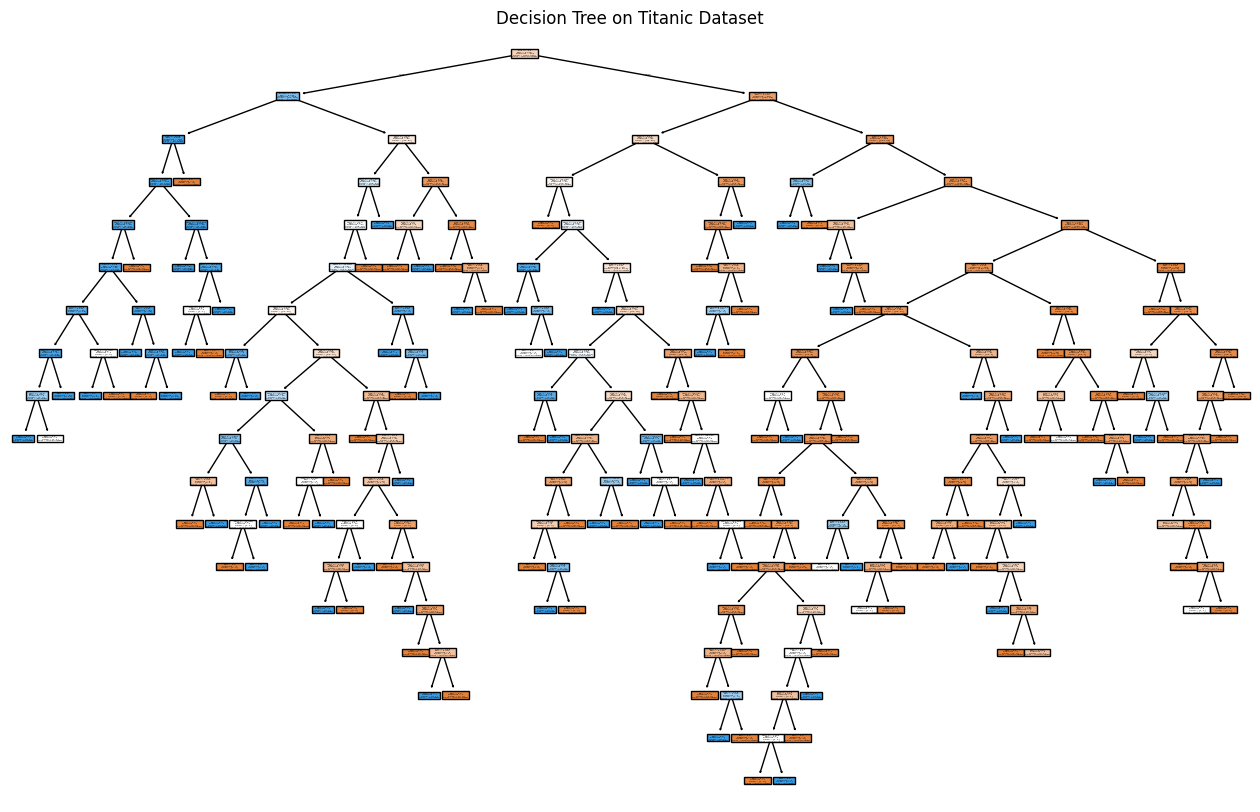

Accuracy on test set: 0.7062937062937062


In [1]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Drop rows with missing target or essential features
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']].dropna()

# Encode categorical variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])           # male=1, female=0
df['embarked'] = le_embarked.fit_transform(df['embarked'])  # S=2, C=0, Q=1

# Features and target
X = df[['pclass', 'sex', 'age', 'fare', 'embarked']]
y = df['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree on Titanic Dataset")
plt.show()

# Print Accuracy
print("Accuracy on test set:", accuracy_score(y_test, clf.predict(X_test)))




In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Data preprocessing
df = titanic[["survived", "pclass", "sex", "age", "sibsp", "parch", "fare"]].dropna()
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Features and target
X = df.drop("survived", axis=1)
y = df["survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train full-depth tree (no depth limit) — likely overfits
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

# Accuracy scores
train_acc_full = accuracy_score(y_train, full_tree.predict(X_train))
test_acc_full = accuracy_score(y_test, full_tree.predict(X_test))

# Train tree with limited depth
limited_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
limited_tree.fit(X_train, y_train)

# Accuracy scores
train_acc_limited = accuracy_score(y_train, limited_tree.predict(X_train))
test_acc_limited = accuracy_score(y_test, limited_tree.predict(X_test))

# Print results
print("==== Accuracy Comparison ====")
print(f"Full Tree -> Train: {train_acc_full:.2f}, Test: {test_acc_full:.2f}")
print(f"Limited Depth Tree (max_depth=3) -> Train: {train_acc_limited:.2f}, Test: {test_acc_limited:.2f}")


==== Accuracy Comparison ====
Full Tree -> Train: 0.99, Test: 0.71
Limited Depth Tree (max_depth=3) -> Train: 0.83, Test: 0.74


In [3]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load Titanic dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
df = df[features + ['Survived']]

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)

# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Define X and y
X = df[features]
y = df['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)

# Train Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)

# Print accuracies
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


/tmp/ipython-input-3-1102514539.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


Decision Tree Accuracy: 0.7542
Random Forest Accuracy: 0.7989


/tmp/ipython-input-8-2282101551.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


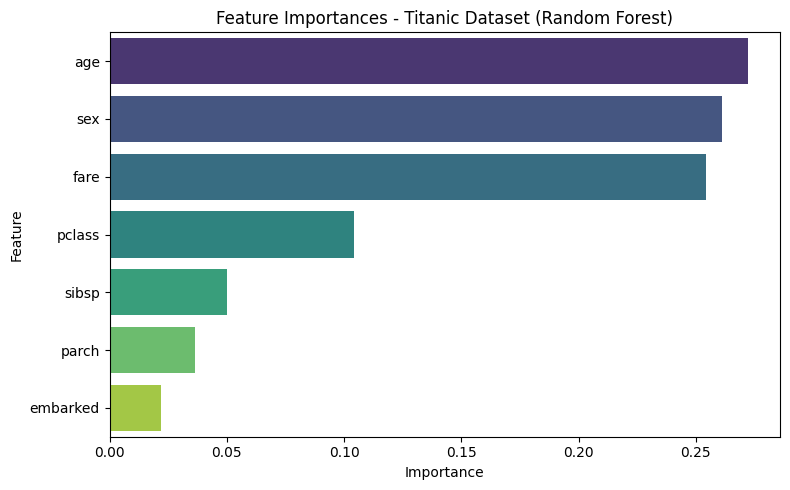

In [8]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Drop rows with missing target values and select features
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()

# Convert categorical variables to numeric
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])
df['embarked'] = le_embarked.fit_transform(df['embarked'])

# Define X and y
X = df.drop('survived', axis=1)
y = df['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature Importances
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances - Titanic Dataset (Random Forest)')
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
X = titanic[features].copy()
y = titanic[target]

# Handle missing values
X['Age'] = SimpleImputer(strategy='median').fit_transform(X[['Age']]).ravel()
X['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(X[['Embarked']]).ravel()

# Encode categorical variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
X['Sex'] = le_sex.fit_transform(X['Sex'])
X['Embarked'] = le_embarked.fit_transform(X['Embarked'])

# Train and evaluate using cross-validation
clf = RandomForestClassifier(n_estimators=200, random_state=42)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Output
print("Cross-validation scores:", scores)
print("Average accuracy       :",scores.mean().round(4))

Cross-validation scores: [0.77094972 0.80898876 0.85955056 0.78651685 0.81460674]
Average accuracy       : 0.8081
